In [41]:
from pharmapynetics.models import PBFTPK, EPBFTPK
import numpy as np

In [42]:
import matplotlib.pyplot as plt

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
t = np.array([0.,  0.5,  1.,  1.5,  2.,  3.,  3.33,  3.66,  4.,
              4.33,  4.66,  5.,  5.33,  5.66,  6.,  7.,  8., 10.,
              12., 16., 24., 48., 72., 96.])
X = np.array([0.,   98.3, 1150., 1340., 1480., 1400., 1350., 1440.,
              1360., 1340., 1180., 1100., 1080., 1090., 1060., 1030.,
              990.,  964., 1030.,  811.,  597.,  302.,  145.,   59.])

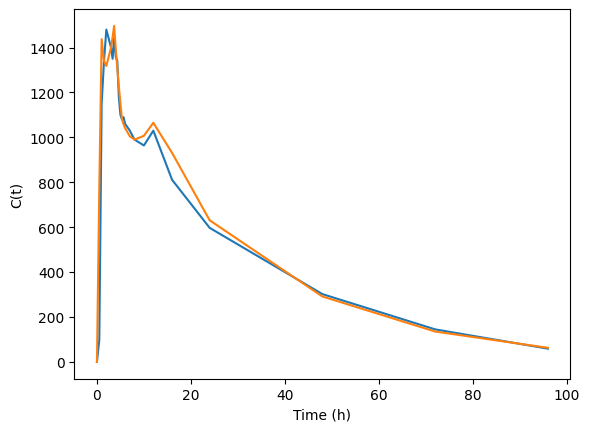

In [45]:
model = EPBFTPK(n_models=3, l=9.0, clipped=True)
model.fit(t, X)
X_sample = model.sample(t)
plt.plot(t, X)

plt.xlabel("Time (h)")
plt.ylabel("C(t)")

plt.plot(t, X_sample)
plt.show()